In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] =(8,6)

In [2]:
train = pd.read_csv('/root/data/Elo/train.csv', parse_dates=['first_active_month'])
test = pd.read_csv('/root/data/Elo/test.csv', parse_dates=['first_active_month'])

In [3]:
train.shape, test.shape

((201917, 6), (123623, 5))

In [4]:
train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08-01,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09-01,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [5]:
train.dtypes

first_active_month    datetime64[ns]
card_id                       object
feature_1                      int64
feature_2                      int64
feature_3                      int64
target                       float64
dtype: object

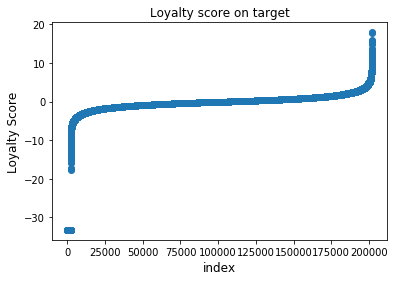

In [6]:
target_col = 'target'

plt.scatter(range(train.shape[0]), np.sort(train[target_col].values))
plt.xlabel('index', fontsize=12)
plt.ylabel('Loyalty Score', fontsize=12)
plt.title('Loyalty score on target')
plt.show()

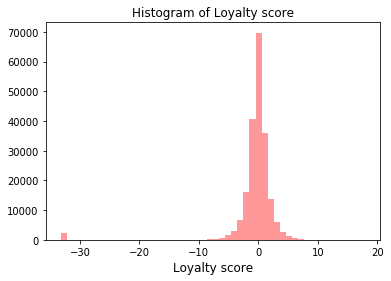

In [7]:
sns.distplot(train[target_col].values, bins=50, kde=False, color='red')
plt.title('Histogram of Loyalty score')
plt.xlabel('Loyalty score', fontsize=12)
plt.show()

In [8]:
# 충성도 값 중 일부는 다른 것보다 멀리 떨어져 있다. (-30 미만). 그들의 카운트
train[train['target']<-30]['target'].count()

2207

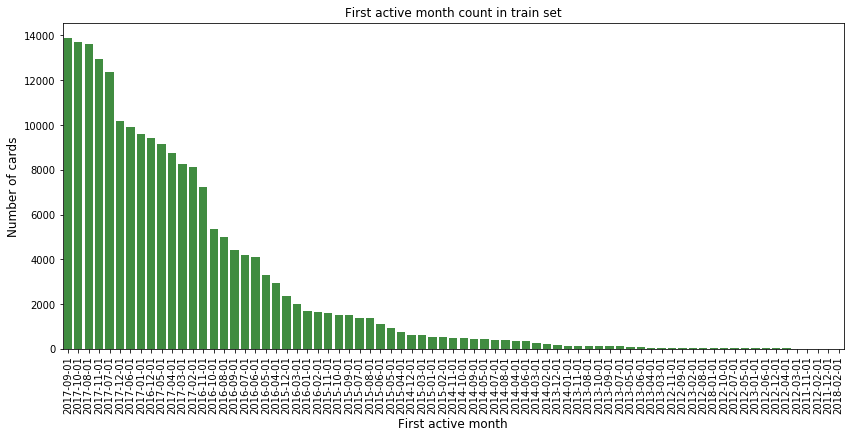

In [10]:
cnt_srs = train['first_active_month'].dt.date.value_counts()
cnt_srs = cnt_srs.sort_index()
plt.figure(figsize=(14, 6))
sns.barplot(cnt_src.index, cnt_src.values, alpha=0.8, color='green')
plt.xticks(rotation='vertical')
plt.xlabel('First active month', fontsize=12)
plt.ylabel('Number of cards', fontsize=12)
plt.title('First active month count in train set')
plt.show()

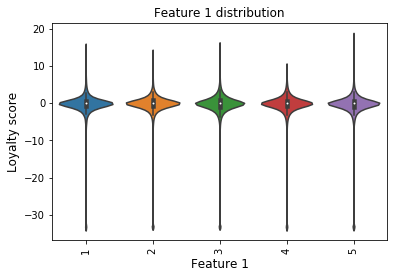

In [11]:
sns.violinplot(x='feature_1', y=target_col, data=train)
plt.xticks(rotation='vertical')
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Loyalty score', fontsize=12)
plt.title('Feature 1 distribution')
plt.show()

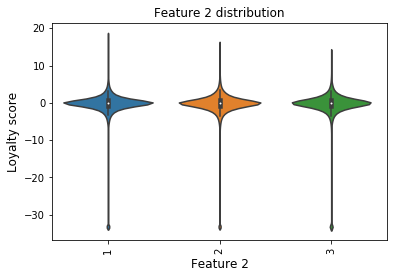

In [13]:
sns.violinplot(x='feature_2', y=target_col, data=train)
plt.xticks(rotation='vertical')
plt.xlabel('Feature 2', fontsize=12)
plt.ylabel('Loyalty score', fontsize=12)
plt.title('Feature 2 distribution')
plt.show()

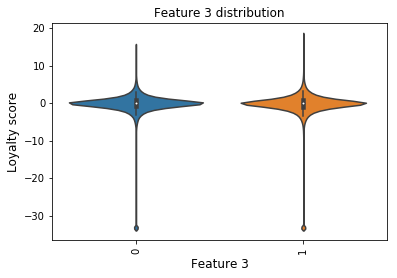

In [14]:
sns.violinplot(x='feature_3', y=target_col, data=train)
plt.xticks(rotation='vertical')
plt.xlabel('Feature 3', fontsize=12)
plt.ylabel('Loyalty score', fontsize=12)
plt.title('Feature 3 distribution')
plt.show()

In [18]:
# 과거 거래 : 카드 거래 내역 데이터 살펴보기

%time

historical = pd.read_csv('historical_transaction.csv')
historical.head()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 20 µs


FileNotFoundError: File b'historical_transaction.csv' does not exist